In [15]:
# Librerias
import numpy as np
from qutip import *
from scipy.interpolate import interp1d
from scipy.integrate import solve_ivp, trapezoid
from tqdm import tqdm
import matplotlib.pyplot as plt
import os


Calculando Valores de Mandel: 100%|██████████| 40/40 [01:03<00:00,  1.59s/it]


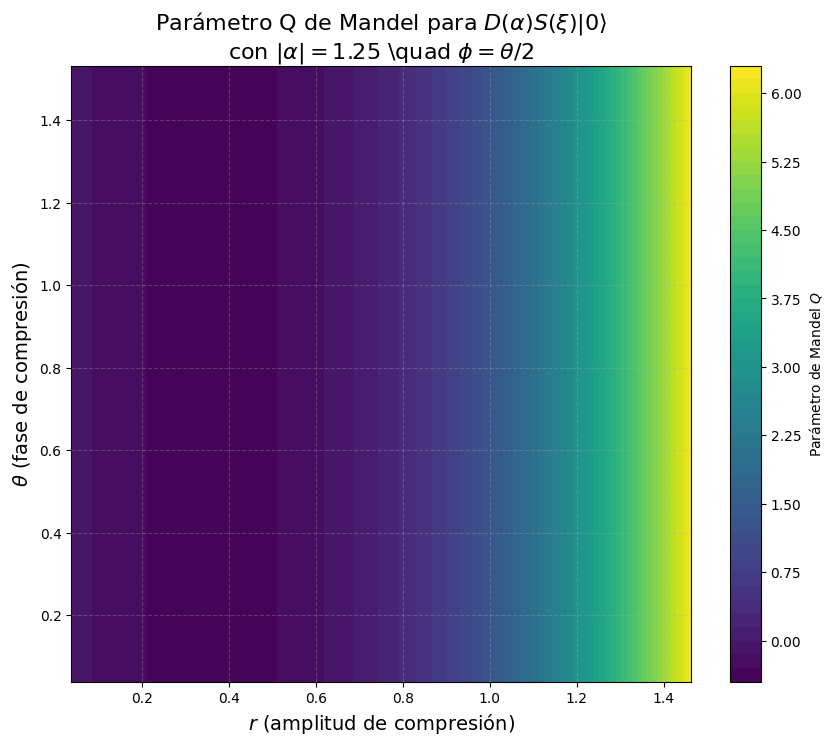

In [16]:
# --- 1. Constantes y Parámetros ---
N = 51 # Aumenté ligeramente N por seguridad para r=1.5
abs_alpha_val = 1.25

# Malla (excluyendo extremos)
num_r_steps = 40
num_theta_steps = 40
r_vals = np.linspace(0, 1.5, num_r_steps + 2)[1:-1]
theta_vals = np.linspace(0, np.pi / 2, num_theta_steps + 2)[1:-1]
R_mesh, THETA_mesh = np.meshgrid(r_vals, theta_vals)

# --- 2. Funciones ---

def calcular_valor_Mandel(psi, N_osc):
    num_op = num(N_osc)
    
    # Check de seguridad: verificar si el estado está normalizado
    # Si la norma baja de 1, significa que el espacio de Hilbert es muy pequeño
    if psi.norm() < 0.99:
        return np.nan # O lanzar un warning
        
    exp_N = expect(num_op, psi)
    exp_N2 = expect(num_op * num_op, psi)
    
    if exp_N == 0:
        return np.nan
        
    return (exp_N2 - exp_N**2 - exp_N) / exp_N

def generate_mandel_on_grid(R, THETA, N_osc, abs_alpha):
    mandel_values_grid = np.zeros_like(R)
    
    for i in tqdm(range(R.shape[0]), desc="Calculando Valores de Mandel"):
        for j in range(R.shape[1]):
            r_ij = R[i, j]
            theta_ij = THETA[i, j]
            
            # Definición de parámetros complejos
            alpha_phase = theta_ij / 2
            alpha_complex = abs_alpha * (np.cos(alpha_phase) + 1j * np.sin(alpha_phase))
            xi_complex = r_ij * (np.cos(theta_ij) + 1j * np.sin(theta_ij))
            
            # Construcción del estado: D(alpha)S(xi)|0>
            # Nota: displace y squeeze crean operadores unitarios
            D_op = displace(N_osc, alpha_complex)
            S_op = squeeze(N_osc, xi_complex)
            psi0 = D_op * S_op * basis(N_osc, 0)
            
            mandel_values_grid[i, j] = calcular_valor_Mandel(psi0, N_osc)
            
    return mandel_values_grid

# --- 3. Ejecución y Gráfica ---

mandel_grid_values = generate_mandel_on_grid(R_mesh, THETA_mesh, N, abs_alpha_val)

def plot_mandel_contour(R, THETA, mandel_values):
    plt.figure(figsize=(10, 8)) # Ajusté el tamaño para proporciones más estándar
    
    # Niveles automáticos o manuales si quieres ver el cruce por cero
    contour = plt.contourf(R, THETA, mandel_values, levels=50, cmap='viridis')
    
    plt.colorbar(contour, label='Parámetro de Mandel $Q$')
    plt.xlabel(r'$r$ (amplitud de compresión)', fontsize=14)
    plt.ylabel(r'$\theta$ (fase de compresión)', fontsize=14)
    
    # CORRECCIÓN AQUÍ: Uso de doble backslash \\ para comandos LaTeX dentro de f-string
    title_str = (f'Parámetro Q de Mandel para $D(\\alpha)S(\\xi)|0\\rangle$\n'
                 f'con $|\\alpha|={abs_alpha_val}$ \\quad $\\phi = \\theta /2$')
    
    plt.title(title_str, fontsize=16)
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.show()

plot_mandel_contour(R_mesh, THETA_mesh, mandel_grid_values)

Calculando Valores de Mandel: 100%|██████████| 40/40 [01:11<00:00,  1.79s/it]


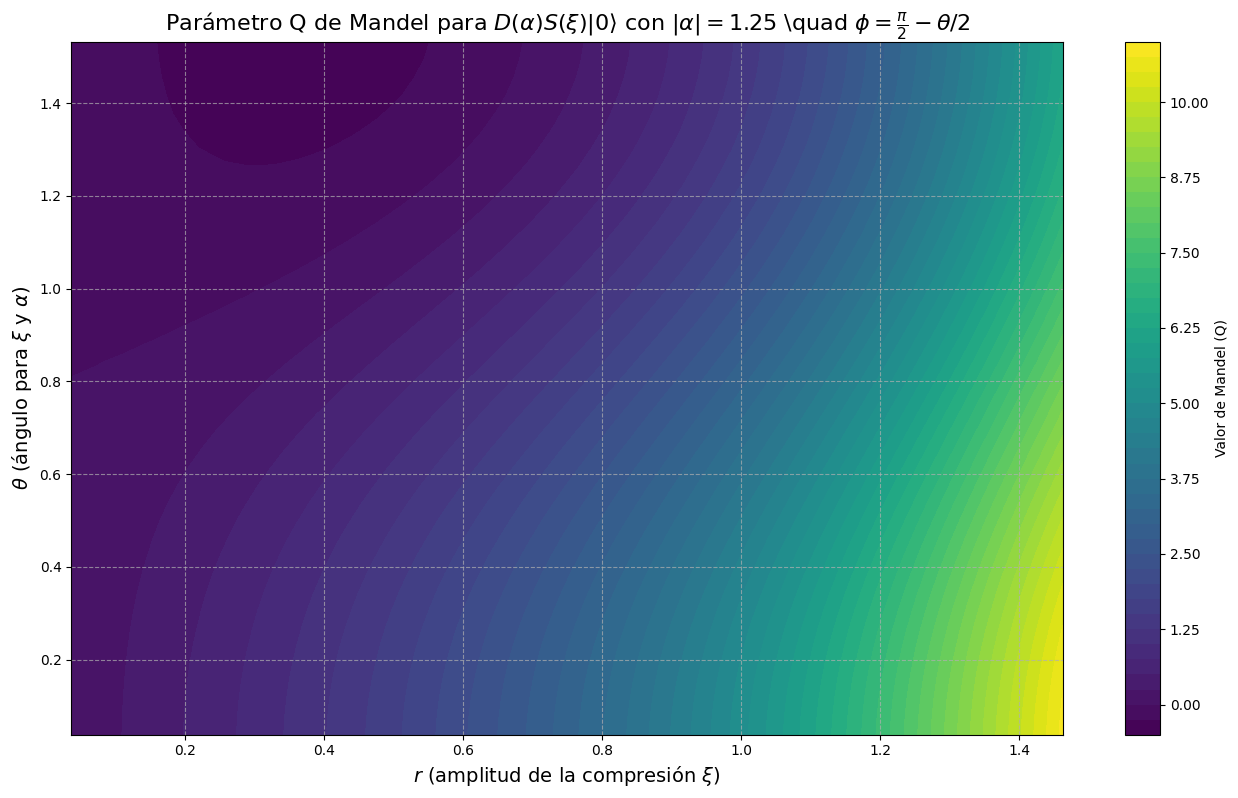

In [ ]:
# --- 1. Definición de Constantes y Malla ---
N = 51 
abs_alpha_val = 1.25

num_r_steps = 40
num_theta_steps = 40

r_vals = np.linspace(0, 1.5, num_r_steps + 2)[1:-1]
theta_vals = np.linspace(0, np.pi / 2, num_theta_steps + 2)[1:-1]
R_mesh, THETA_mesh = np.meshgrid(r_vals, theta_vals)

# --- 2. Función de Cálculo ---
def calcular_valor_Mandel(psi, N_osc):
    num_op = num(N_osc)
    exp_N = expect(num_op, psi)
    exp_N2 = expect(num_op * num_op, psi)
    
    if exp_N == 0: 
        return np.nan 
        
    return (exp_N2 - exp_N**2 - exp_N) / exp_N

def generate_mandel_on_grid(R, THETA, N_osc, abs_alpha):
    mandel_values_grid = np.zeros_like(R)
    
    for i in tqdm(range(R.shape[0]), desc="Calculando Valores de Mandel"):
        for j in range(R.shape[1]):
            r_ij = R[i, j]
            theta_ij = THETA[i, j]
            
            # Tu nueva fase modificada
            alpha_phase = (np.pi/2) - theta_ij / 2
            alpha_complex = abs_alpha * (np.cos(alpha_phase) + 1j * np.sin(alpha_phase))
            
            xi_complex = r_ij * (np.cos(theta_ij) + 1j * np.sin(theta_ij))
            
            psi0 = displace(N_osc, alpha_complex) * squeeze(N_osc, xi_complex) * basis(N_osc, 0)
            mandel_values_grid[i, j] = calcular_valor_Mandel(psi0, N_osc)
            
    return mandel_values_grid

# Calculamos los valores
mandel_grid_values = generate_mandel_on_grid(R_mesh, THETA_mesh, N, abs_alpha_val)

def plot_mandel_contour(R, THETA, mandel_values, r_label, theta_label):
    """
    Grafica los valores de Mandel como un gráfico de contorno.
    """
    plt.figure(figsize=(16, 9))
    
    contour = plt.contourf(R, THETA, mandel_values, levels=50, cmap='viridis')
    plt.colorbar(contour, label='Valor de Mandel (Q)')
    
    plt.xlabel(r_label, fontsize=14)
    plt.ylabel(theta_label, fontsize=14)
    
    # Usando f-string (opción recomendada)
    title_text = fr'Parámetro Q de Mandel para $D(\alpha)S(\xi)|0\rangle$ con $|\alpha|={abs_alpha_val}$ \quad $\phi = \frac{{\pi}}{{2}} - \theta/2$'
    
    plt.title(title_text, fontsize=16)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Graficamos
plot_mandel_contour(R_mesh, THETA_mesh, mandel_grid_values, 
                    r'$r$ (amplitud de la compresión $\xi$)', 
                    r'$\theta$ (ángulo para $\xi$ y $\alpha$)')

In [17]:
# Imprimimos algunos valores de la cuadrícula para verificación (opcional)
print("\nAlgunos valores calculados de la cuadrícula:")
num_samples_to_print = 52

for _ in range(num_samples_to_print):
    idx_i = np.random.randint(R_mesh.shape[0])
    idx_j = np.random.randint(R_mesh.shape[1])
    
    r_sample = R_mesh[idx_i, idx_j]
    theta_sample = THETA_mesh[idx_i, idx_j]
    q_sample = mandel_grid_values[idx_i, idx_j]
    
    # Recalcular alpha_complex y xi_complex para este punto específico
    alpha_phase_sample = theta_sample / 2
    alpha_c_sample = abs_alpha_val * (np.cos(alpha_phase_sample) + 1j * np.sin(alpha_phase_sample))
    
    xi_c_sample = r_sample * (np.cos(theta_sample) + 1j * np.sin(theta_sample))
    
    print(f"  r: {r_sample:.4f}, theta: {theta_sample:.4f} (rad), Q: {q_sample:.4f}")
    print(f"    α (complejo): {alpha_c_sample.real:.4f}{alpha_c_sample.imag:+.4f}j")
    print(f"    ξ (complejo): {xi_c_sample.real:.4f}{xi_c_sample.imag:+.4f}j")



Algunos valores calculados de la cuadrícula:
  r: 0.6220, theta: 0.6896 (rad), Q: -0.1432
    α (complejo): 1.1764+0.4225j
    ξ (complejo): 0.4798+0.3957j
  r: 0.4024, theta: 0.6896 (rad), Q: -0.3661
    α (complejo): 1.1764+0.4225j
    ξ (complejo): 0.3105+0.2560j
  r: 0.5488, theta: 1.4559 (rad), Q: -0.2571
    α (complejo): 0.9332+0.8317j
    ξ (complejo): 0.0629+0.5452j
  r: 0.9146, theta: 0.1532 (rad), Q: 0.8251
    α (complejo): 1.2463+0.0957j
    ξ (complejo): 0.9039+0.1396j
  r: 0.2561, theta: 1.5325 (rad), Q: -0.3377
    α (complejo): 0.9007+0.8668j
    ξ (complejo): 0.0098+0.2559j
  r: 1.0610, theta: 0.3448 (rad), Q: 1.7199
    α (complejo): 1.2315+0.2144j
    ξ (complejo): 0.9985+0.3586j
  r: 0.4390, theta: 0.8429 (rad), Q: -0.3525
    α (complejo): 1.1406+0.5113j
    ξ (complejo): 0.2921+0.3278j
  r: 0.5854, theta: 1.4559 (rad), Q: -0.2055
    α (complejo): 0.9332+0.8317j
    ξ (complejo): 0.0671+0.5815j
  r: 1.3171, theta: 0.3448 (rad), Q: 4.2251
    α (complejo): 1.2315